<a href="https://colab.research.google.com/github/utkarsh-k-exp/Forecasting--Principles-and-Practice/blob/master/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import statsmodels.api as sm
from scipy import stats

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Helper Functions

In [2]:
def plot_time_series(ts, xlabel = None, ylabel = None, title = None):
  """
  Function to plot a single time series

  Arguments:
  ts -- a pandas data frame, a time series data

  Returns:
  ts_figure -- an object for time series plot
  """
  fig, ax = plt.subplots()

  plt.style.use("seaborn")

  fig.set_figheight(5)
  fig.set_figwidth(20)

  ax.plot(ts)
  ax.set_xlabel(xlabel, fontsize = 15)
  ax.set_ylabel(ylabel, fontsize = 15)
  ax.set_title(title, fontsize = 15)
  ax.grid(linestyle = "--", color = 'black')

  plt.tight_layout()

  return fig, ax

def box_cox_transformation(ts, lambd):
  """
  Function to implement box cox tranformation on the original scale
  
  Arguments:
  ts -- a pandas time series, a time series data
  lambd -- a parameter for box cox tranformation

  Returns:
  ts_transformed -- a pandas data frame, box cox transformed time series
  """

  if lambd == 0:
    return np.log(ts)
  else:
    return (ts**lambd - 1)/lambd

def reverse_box_cox_tranformation(ts_tranformed, lambd):
  """
  Function takes the transformed data and convert it to the original scale

  Arguments:
  ts_transformed -- a pandas data frame, a time series data scaled based on box_cox transformation formula
  lambd -- a value between 0 and 1, hyper-parameter for transformation

  Returns:
  ts -- a pandas data frame, data scaled to original scale
  """
  if lambd == 0:
    return np.exp(ts_tranformed)
  else:
    return (ts_transformed * lambd + 1)**(1/lambd)

def s_naive_forecast(ts, seasonal_period, horizon_start, horizon_end):
  """
  Function to implement the seasonal naive forecast.

  Arguments:
  ts -- a pandas data frame, a time series data
  seasonal_period -- seasonal period in which the pattern repeats itself. monthly = 12, quarterly = 4, daily = 365 etc.

  Returns:
  
  """
  model = sm.tsa.statespace.SARIMAX(ts, order = (0, 0, 0), seasonal_order=(0, 1, 0, seasonal_period))
  model_fit = model.fit()

  ts_forecasts = model_fit.predict(start = horizon_start, end = horizon_end)
  ts_forecasts = pd.DataFrame(ts_forecasts)

  return ts_forecasts

def naive_forecast(ts):
  """
  Function to implement the naive forecast.

  Arguments:
  ts -- a pandas data frame, a time series data

  Returns:
  model_fit -- a naive model fit on the time series data
  """
  model = sm.tsa.statespace.SARIMAX(ts, order=(0, 0, 0), seasonal_order=(0, 1, 0, 0))
  model_fit = model.fit()

  return model_fit

# Question: 1

For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance.

*   usnetelec
*   usgdp
* mcopper
* enplanements

**1.1 usnetelec**

In [3]:
# usmelec: Electricity monthly total net generation. January 1973 - June 2013

ts_usmelec = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usmelec.csv", index_col="time")
ts_usmelec.drop("Unnamed: 0", axis = 1, inplace = True)

Plotting the data on the original scale

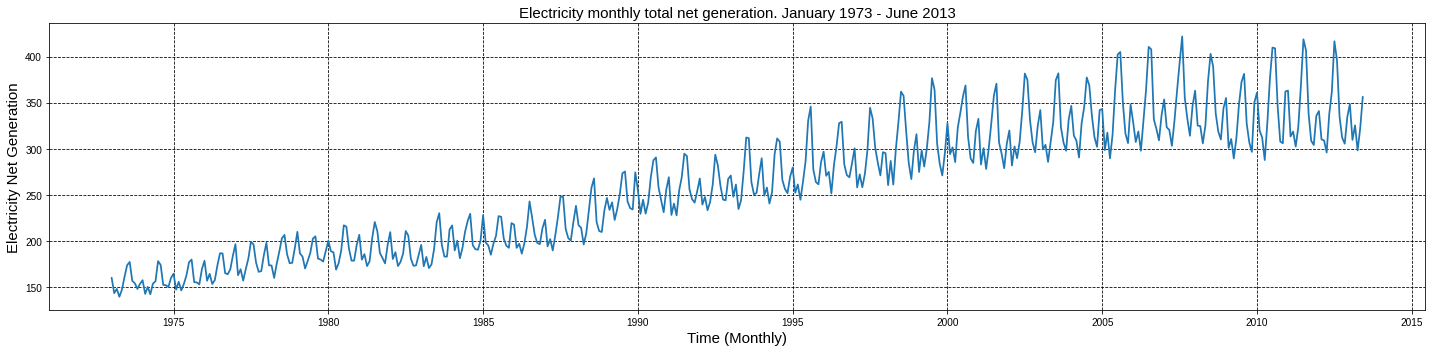

In [4]:
ts_usmelec_fig = plot_time_series(ts_usmelec, xlabel = "Time (Monthly)", ylabel = "Electricity Net Generation", title = "Electricity monthly total net generation. January 1973 - June 2013")

Variance of the data is increasing over time. Let's see the impact of box cox tranformation on the variance

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a9726d908>)

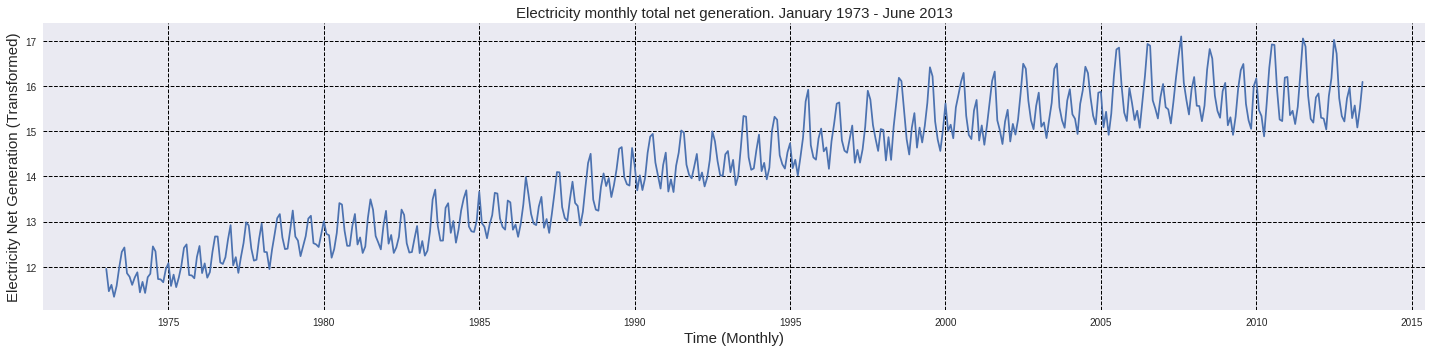

In [5]:
ts_usmelec_transformed = box_cox_transformation(ts_usmelec, lambd = 0.3)

# plotting the transformed series
plot_time_series(ts_usmelec_transformed, xlabel = "Time (Monthly)", ylabel = "Electricity Net Generation (Transformed)", title = "Electricity monthly total net generation. January 1973 - June 2013")

**A value of lambda between 0.3 and 0.5 leads to a tranformation with almost same variance throughout**

**1.2 usgdp**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a9535bfd0>)

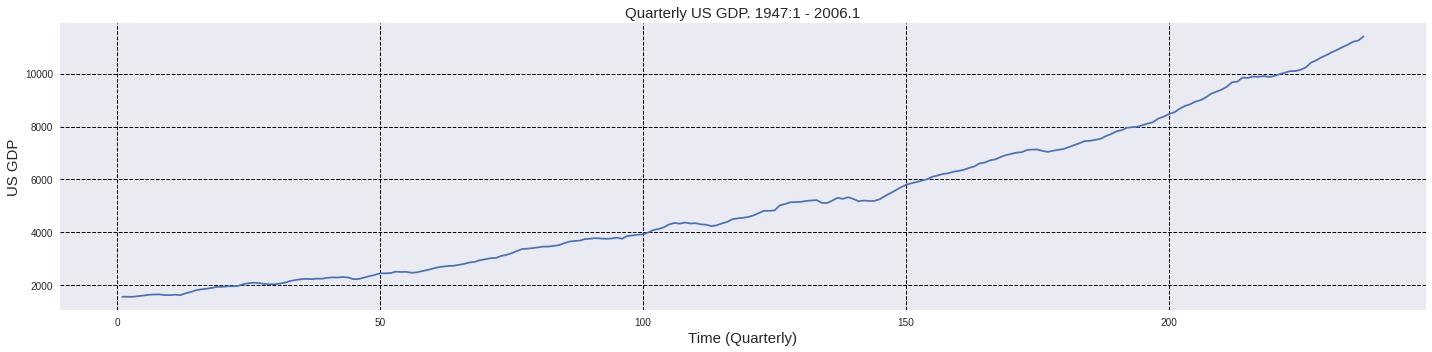

In [6]:
# let's explore the usgdp data

ts_usgdp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usgdp.csv", index_col="Unnamed: 0")

# plotting the original data

plot_time_series(ts_usgdp, xlabel = "Time (Quarterly)", ylabel = "US GDP", title = "Quarterly US GDP. 1947:1 - 2006.1")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a94af1e48>)

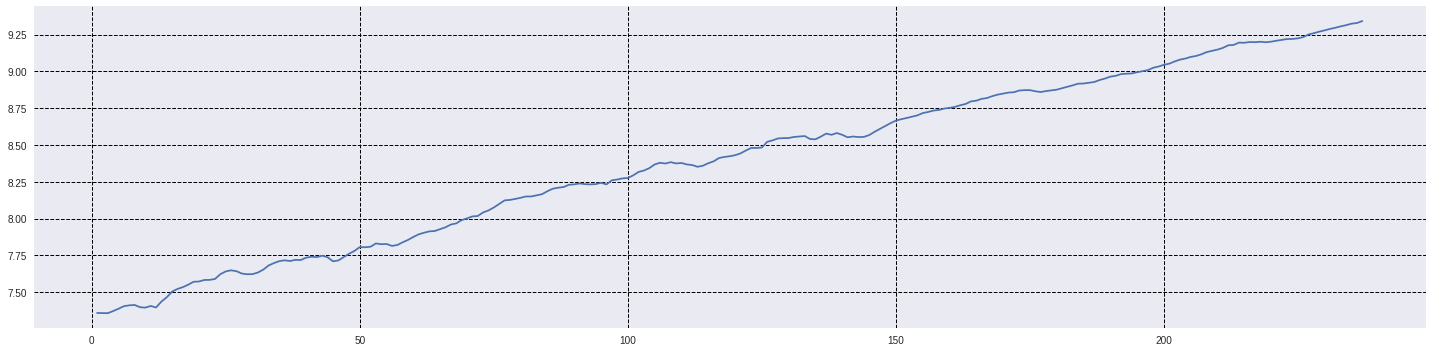

In [7]:
ts_usgdp_transformed = box_cox_transformation(ts_usgdp, lambd = 0)  # applying box cox tranformation on the original scale

# plotting the tranformed time series
plot_time_series(ts_usgdp_transformed)

**Taking a log tranformation or power tranformation does a decent job of stablizing the variance**

**1.3 mcopper**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a94a56320>)

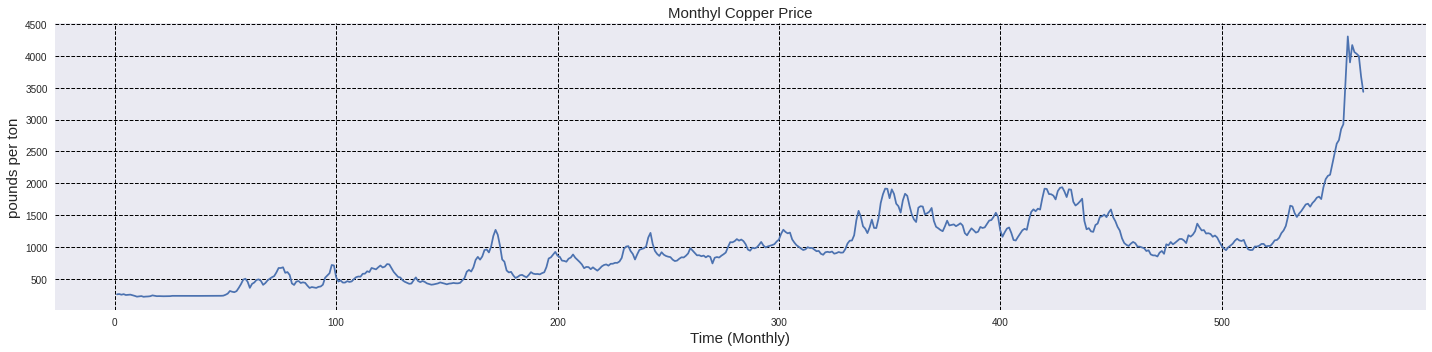

In [8]:
# Exploring the mcopper data

ts_mcopper = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/mcopper.csv", index_col="Unnamed: 0")

# plotting the original data
plot_time_series(ts_mcopper, xlabel = "Time (Monthly)", ylabel = "pounds per ton", title = "Monthyl Copper Price")

Data doesn't have contant variance throughout. Let's see the impact of box cox tranformation on the data.

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a94af1d30>)

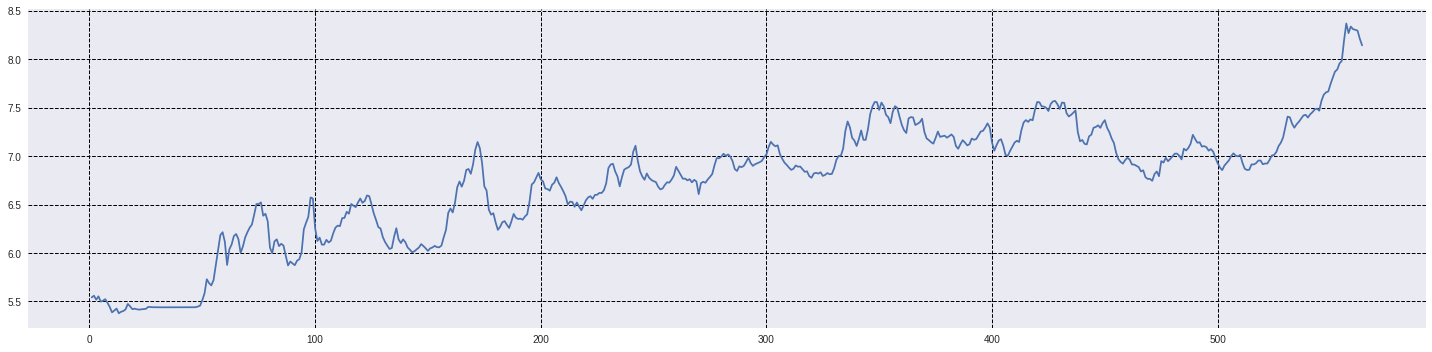

In [9]:
ts_mcopper_transformed = box_cox_transformation(ts_mcopper, lambd = 0)

# plotting the tranformed time series

plot_time_series(ts_mcopper_transformed)

**Log tranformation has done a great job in stablizing the variance throughout the data**

**1.4 enplanements**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a949ad6d8>)

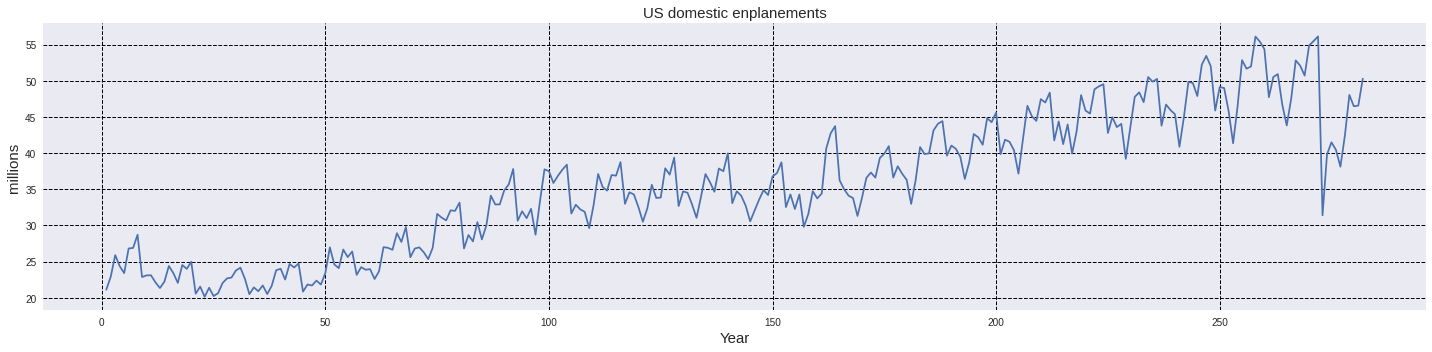

In [10]:
# Exploring the enplanements data

ts_enplanements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/enplanements.csv", index_col = "Unnamed: 0")

# plotting the time series data
plot_time_series(ts_enplanements, xlabel="Year", title = "US domestic enplanements", ylabel="millions")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a9496b908>)

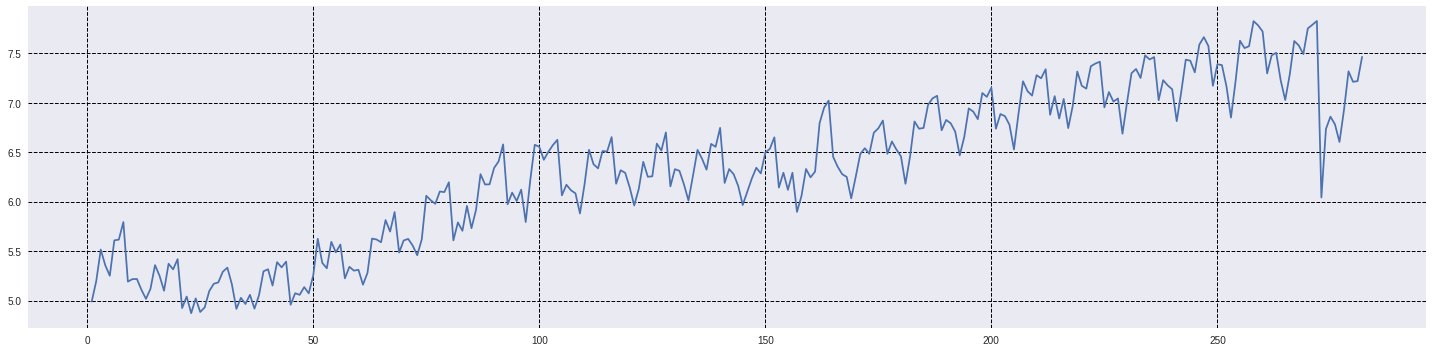

In [11]:
ts_enplanements_tranformed = box_cox_transformation(ts_enplanements, lambd = 0.3)

# plotting the tranformed data

plot_time_series(ts_enplanements_tranformed)

**Power tranformation with lambda of value between 0.3 and 0.5 would be a desent choice. Though, data seems almost unchanged after the tranformation.**

# Question: 2

Why is a Box-Cox transformation unhelpful for the cangas data?

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a948f8358>)

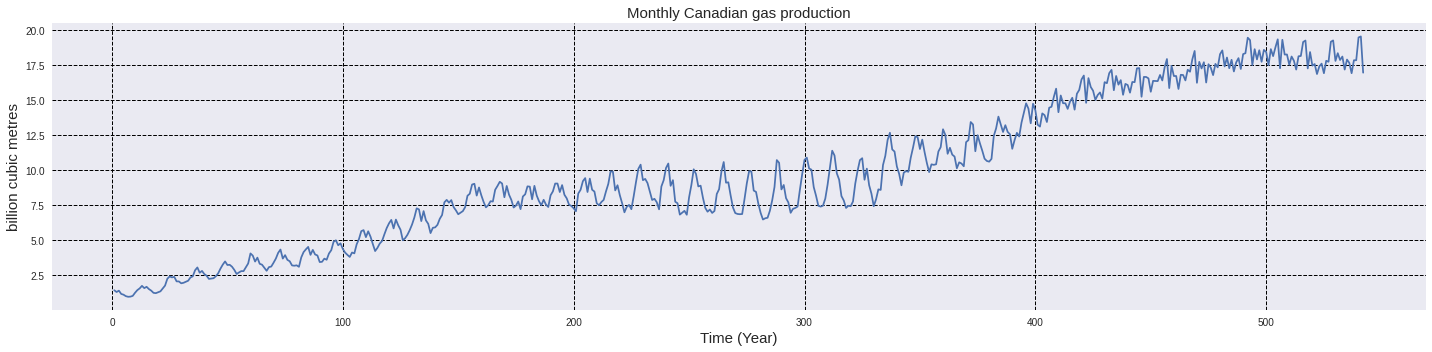

In [12]:
# importing the cangas data
ts_cangas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/cangas.csv", index_col="Unnamed: 0")

# plotting the data
plot_time_series(ts_cangas, xlabel = "Time (Year)", ylabel = "billion cubic metres", title = "Monthly Canadian gas production")

Data doesn't have a constant variance throughout

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a948a82b0>)

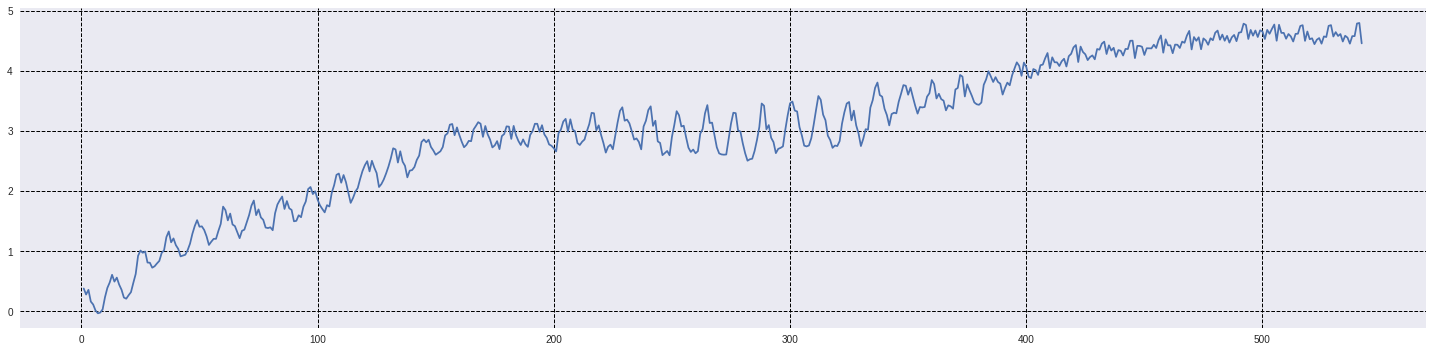

In [13]:
ts_cangas_tranformed = box_cox_transformation(ts_cangas, lambd = 0.3)  # box cox tranformation of the data

# plotting the transformed data

plot_time_series(ts_cangas_tranformed)

**Conclusion: Neither log or power tranformation is useful for cangas data as transformation is not making the variance constant throughout. Therefore, box cox tranformation is useless for this data.**

# Question: 3 

What Box-Cox transformation would you select for your retail data (from Exercise 3 in Section 2.10)?

In [14]:
ts_retail = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/retail.xlsx", skiprows=[1], index_col = "Unnamed: 0")

categories = ts_retail.columns  # names of all the columns

random_category = np.random.choice(categories)  # picking a random time series from all the categories

ts_retail = ts_retail[[random_category]]

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a947c4dd8>)

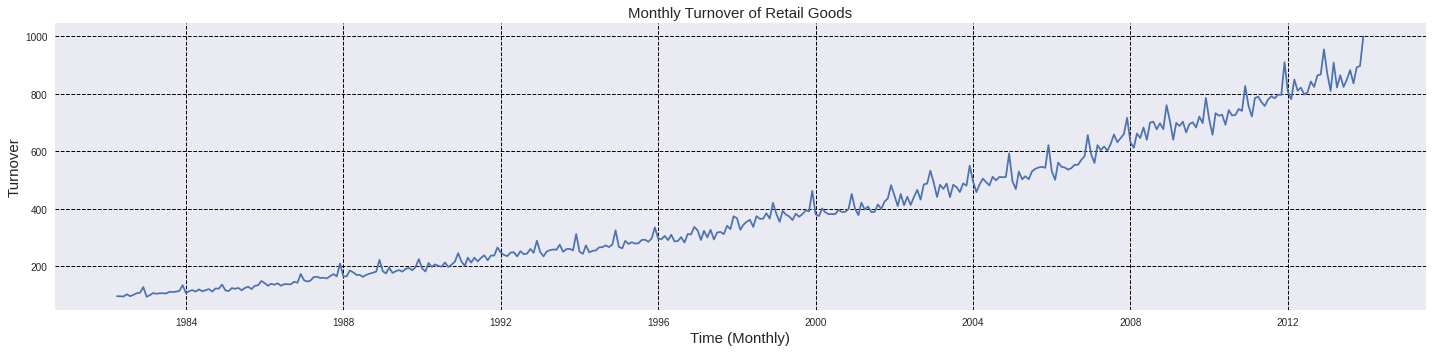

In [15]:
# plotting the time series data
plot_time_series(ts_retail, xlabel = "Time (Monthly)", ylabel = "Turnover", title = "Monthly Turnover of Retail Goods")

Data doesn't have a contant variance througout. A simpler data always leads to better prediction. Let's see if box cox tranformation can make the variance contant throughout.

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a94a33b00>)

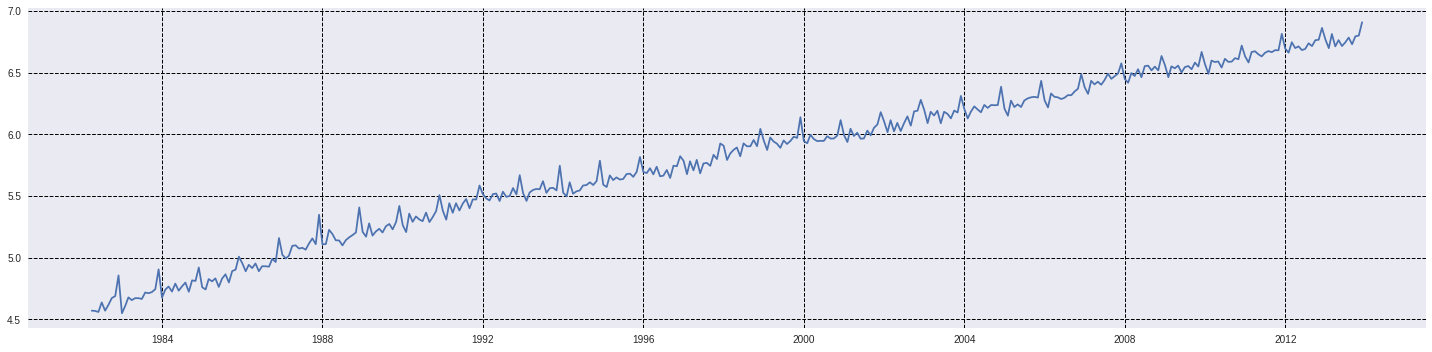

In [16]:
ts_retail_tranformed = box_cox_transformation(ts_retail, lambd = 0.0)

# plotting the tranformed data

plot_time_series(ts_retail_tranformed)

**Conclusion: Taking the log tranformation of the original data makes the variance contant throughout.**

# Question: 4

For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect. dole, usdeaths, bricksq.

**4.1 dole**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a94478550>)

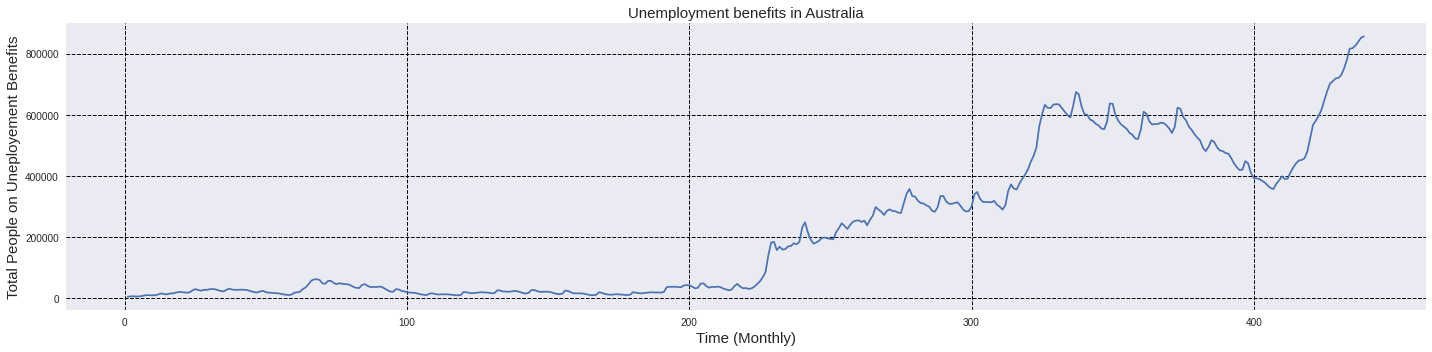

In [17]:
ts_dole = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/dole.csv", index_col="Unnamed: 0")

# plotting the time series data
plot_time_series(ts_dole, xlabel = "Time (Monthly)", ylabel = "Total People on Uneployement Benefits", title = "Unemployment benefits in Australia")

dole data doesn't have a contant variance throughout

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a944ac828>)

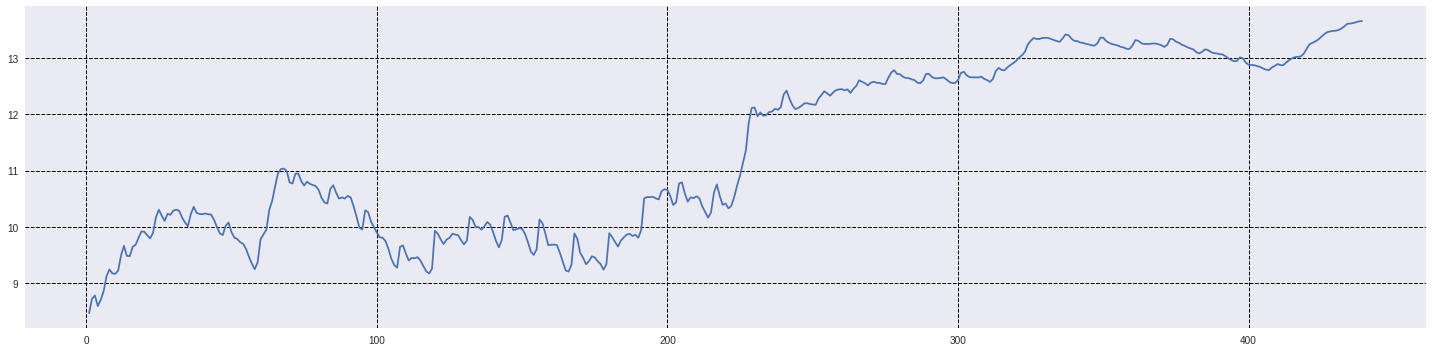

In [18]:
ts_dole_tranformed = box_cox_transformation(ts_dole, lambd = 0.0)

# plotting the tranformed data

plot_time_series(ts_dole_tranformed)

**Conclusion: Taking a log tranformation of the data makes the variance contant throughout.**

**4.2 usdeaths**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a943780b8>)

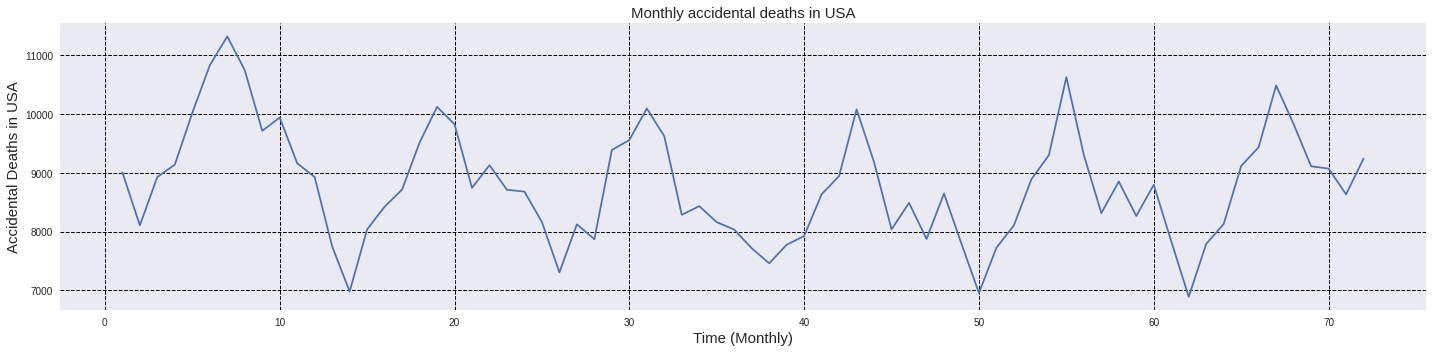

In [19]:
ts_usdeaths = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usdeaths.csv", index_col = "Unnamed: 0")

# plotting the time series

plot_time_series(ts_usdeaths, xlabel = "Time (Monthly)", ylabel = "Accidental Deaths in USA", title = "Monthly accidental deaths in USA")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a936bb0b8>)

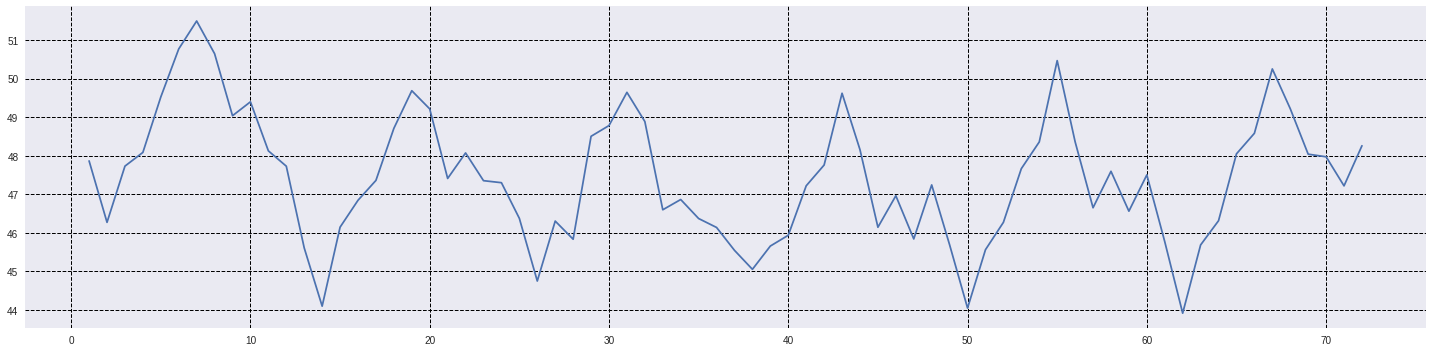

In [20]:
ts_usdeaths_transformed = box_cox_transformation(ts_usdeaths, lambd = 0.3)

# plotting the transformed time series

plot_time_series(ts_usdeaths_transformed)

**Conclusion: Data already has a contant mean throughout. Using tranformation on this data will not have any visible impact**

**4.3 bricksq**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a935cccc0>)

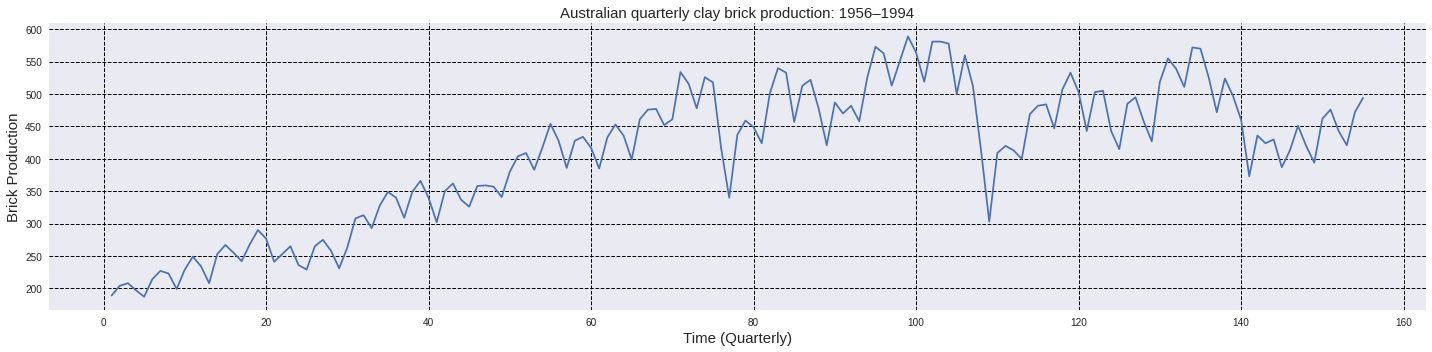

In [21]:
ts_bricksq = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/bricksq.csv", index_col = "Unnamed: 0")

# plotting the data

plot_time_series(ts_bricksq, xlabel = "Time (Quarterly)", ylabel = "Brick Production", title = "Australian quarterly clay brick production: 1956–1994")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a938517b8>)

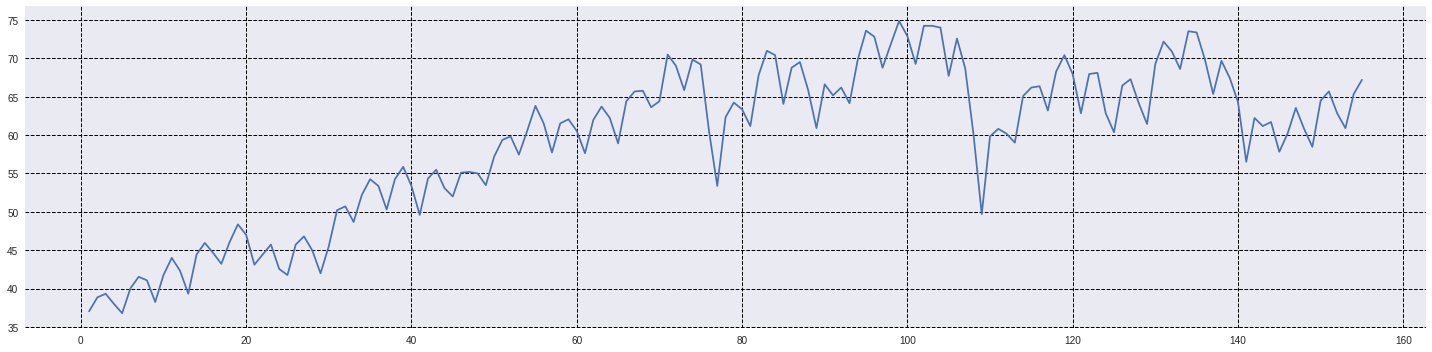

In [22]:
ts_bricksq_transformed = box_cox_transformation(ts_bricksq, lambd = 0.6)

# plotting the tranformed data

plot_time_series(ts_bricksq_transformed)

**Conclusion: Neither log or power tranformation has any effect on variance of the data**

**Final Conclusion:**



1.   If a transformation can make the variance contant throughout, use it or else don't use tranformations
2.   If using tranformation, make predictions on tranformed data and then scale it back to the original scale
3. Transformations are not always likely to use in most of the data



# Question: 5

Calculate the residuals from a seasonal naïve forecast applied to the quarterly Australian beer production data from 1992. 

Test if the residuals are white noise and normally distributed.

What do you conclude?

In [49]:
# importing the data
ts_ausbeer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/ausbeer.csv", index_col='time')
ts_ausbeer.drop("Unnamed: 0", axis = 1, inplace = True)
ts_ausbeer = ts_ausbeer[1992.00:]  # slicing the data from year 1992 onwards
ts_ausbeer.head()

,value
time,
1992.00,443
1992.25,410
1992.50,420
1992.75,532
1993.00,433


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a8bd2e860>)

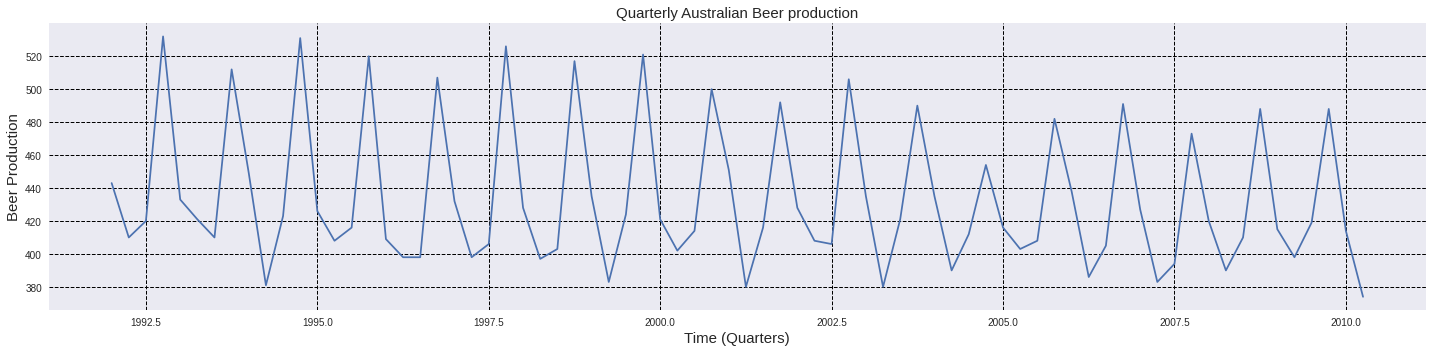

In [50]:
# plotting the time series data
plot_time_series(ts_ausbeer, "Time (Quarters)", "Beer Production", "Quarterly Australian Beer production")

In [101]:
# applying the seasonal naive forecast on the data
ts_ausbeer_forecasts = s_naive_forecast(ts_ausbeer, 4, horizon_start=1992.00, horizon_end=2010.25)
ts_ausbeer_forecasts.rename(columns={0: "value"}, inplace = True)
ts_ausbeer_forecasts.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,value
time,
1992.00,0.0
1992.25,0.0
1992.50,0.0
1992.75,0.0
1993.00,443.0


In [68]:
# Computing the residuals for the forecasts
residuals = ts_ausbeer - ts_ausbeer_forecasts
residuals = residuals.loc[1993.00:, :]  # removing the first four residuals as we do not have the forecasts for these using s-naive forecast

**5.1 Plotting the time-series of the residuals**

Mean of the residuals:  value   -1.571429
dtype: float64


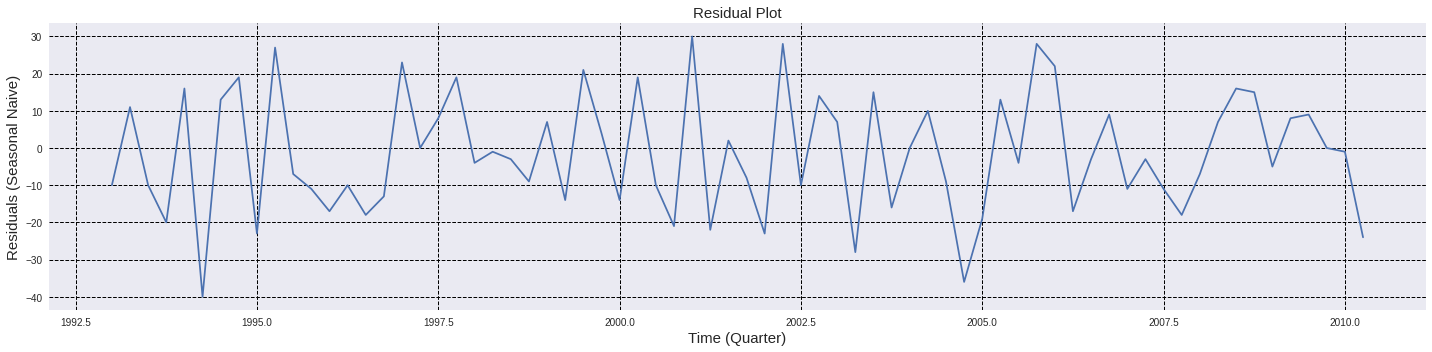

In [69]:
plot_time_series(residuals, xlabel = "Time (Quarter)", ylabel = "Residuals (Seasonal Naive)", title = "Residual Plot")
print("Mean of the residuals: ", np.mean(residuals))

**5.2 Checking the Auto-Correlation between the residuals**

Figure(576x396)
P-value obtained from the ljung-box test is  [8.33561066e-05]


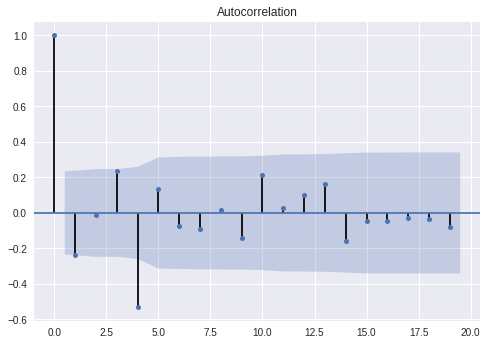

In [72]:
# plotting the auto-correlation function plot for the residuals
print(plot_acf(residuals.loc[1993.00:, :]))

# performing the ljung-box test for checking the auto-correaltion between residuals
p_value = sm.stats.diagnostic.acorr_ljungbox(residuals, lags=[8])[1]

print("P-value obtained from the ljung-box test is ", p_value)

**5.3 Checking the distribution of residuals**

p-value for shapiro wilik test is  0.38650640845298767


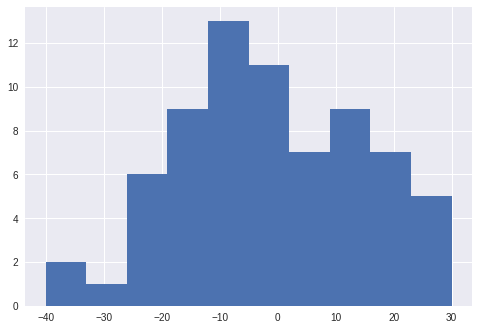

In [79]:
# plotting the histogram of residuals
plt.hist(residuals.values)

# performing shapiro-wilik test for normality
print("p-value for shapiro wilik test is ", stats.shapiro(residuals.values)[1])

**Conclusion:**

1. **No Auto-Correlation**: Both ACF plot and ljun-box test suggest that there is an auto-correlation between the residuals.

Ljung-Box Test: Assumes null hypothesis as no aauto-correlation between the residuals. p-value is less than 0.005. Hence, rejecting the null hypothesis in facour of alternative hypothesis that there is an auto-correlation between the residuals.

2. **Zero Mean**: From time series it looks like the mean is close to zero. Actual value of mean is -1.57. Very close to zero but not exactly zero

**Above points suggests that the residuals are not white noise and hence seasonal naive fails to capture all the available information present in the data. Therefore, a better forecasting model is required.**

Additional Properties of residuals:

1. **Contant Variance**: Variance looks constant throughout with some outliers.

2. **Normal Distribution**: Both histogram and shapiro-wilik test suggests that residuals are normally distributed.

Shapiro Wilik Test: Assumes null hypothesis as data is normally distributed and p-value > 0.005 so we go with the null hypothesis that residuals are normally distributed. 

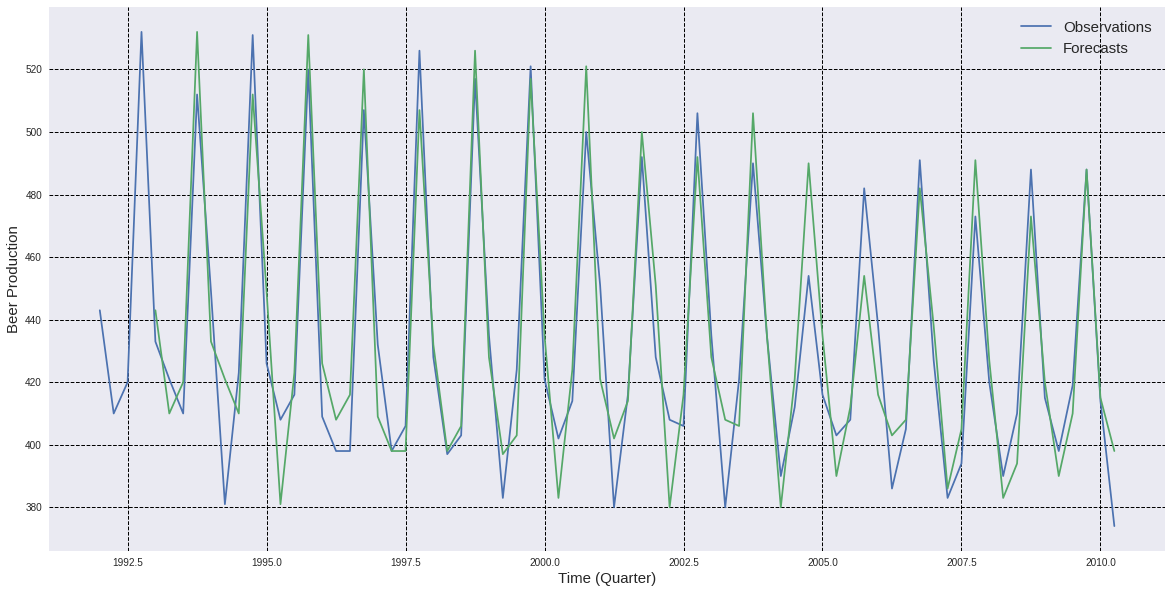

In [115]:
# plotting the original data and the forecasts on the same plot
plt.figure(figsize = (20, 10))
plt.plot(ts_ausbeer, label = 'Observations')
plt.plot(ts_ausbeer_forecasts.loc[1993.00:, :], label = 'Forecasts')
plt.grid(linestyle = '--', color = 'black')
plt.xlabel("Time (Quarter)", fontsize = 15)
plt.ylabel("Beer Production", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Question: 6

Repeat the exercise for the WWWusage and bricksq data. Use whichever of naive() or snaive() is more appropriate in each case.

**6.1 WWWusage**

In [84]:
ts_wwwusage = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/WWWusage.csv', index_col = 'time')
ts_wwwusage.drop("Unnamed: 0", axis = 1, inplace = True)
ts_wwwusage.describe()

,value
count,100.000000
mean,137.080000
std,39.999414
min,83.000000
25%,99.000000
50%,138.500000
75%,167.500000
max,228.000000


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a898aa0b8>)

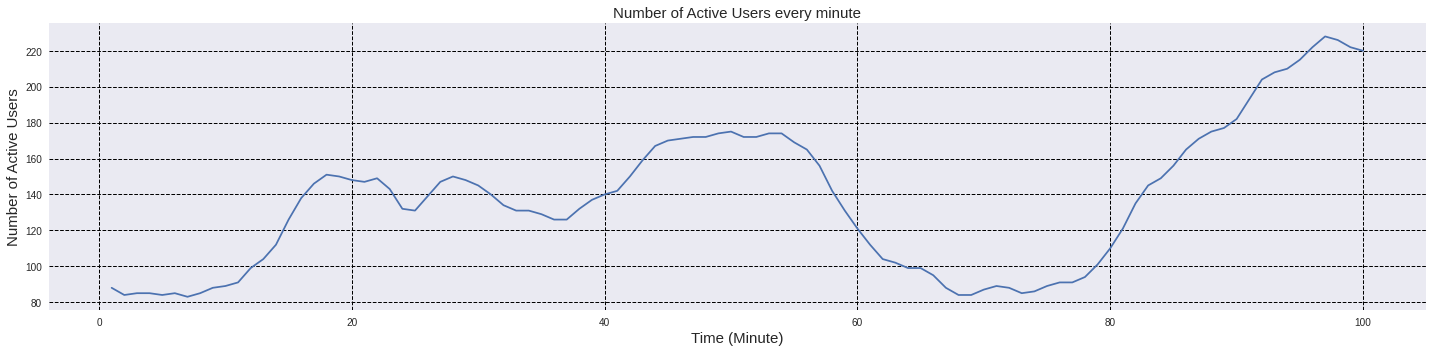

In [85]:
# plotting the time series data
plot_time_series(ts_wwwusage, "Time (Minute)", "Number of Active Users", "Number of Active Users every minute")

Looks like a random walk and hence naive method is a better choice.

In [97]:
ts_wwwusage_forecasts = s_naive_forecast(ts_wwwusage, 2, horizon_start = 1, horizon_end = 100)  # computing the forecast
ts_wwwusage_forecasts.rename(columns = {0: "value"}, inplace = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [119]:
residuals = ts_wwwusage - ts_wwwusage_forecasts  # computing the forecast for the naive forecast
residuals = residuals.loc[2:, :]  # removing the first observation from the residuals as we don't have the forecast for the first observation

**6.1.1 Plotting Time Series for Residuals**

Mean of the residuals is  value    1.333333
dtype: float64


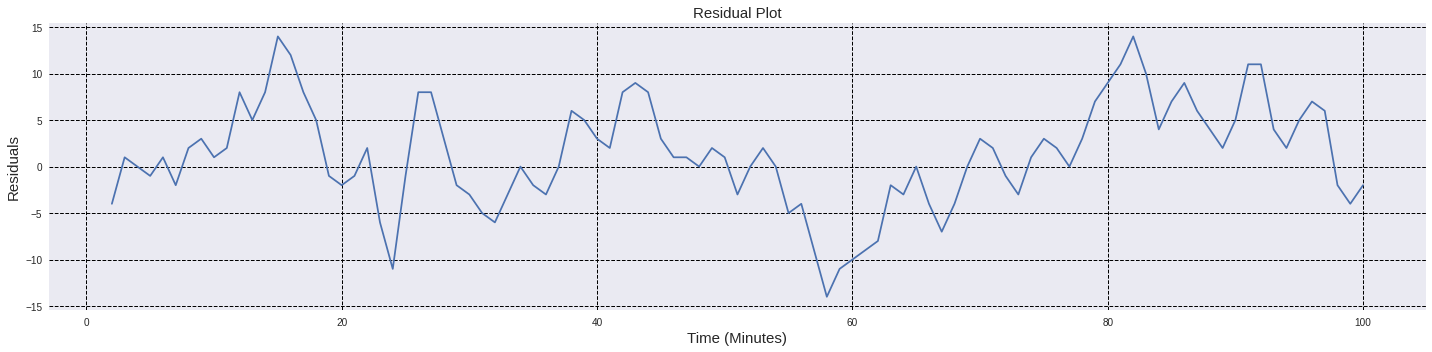

In [122]:
plot_time_series(residuals, xlabel = 'Time (Minutes)', ylabel = "Residuals", title = "Residual Plot")
print("Mean of the residuals is ", np.mean(residuals))

**6.1.2 Check for Auto-Correlatin Amongst Residuals**

P-value for the ljung box test is  [3.01271971e-26]


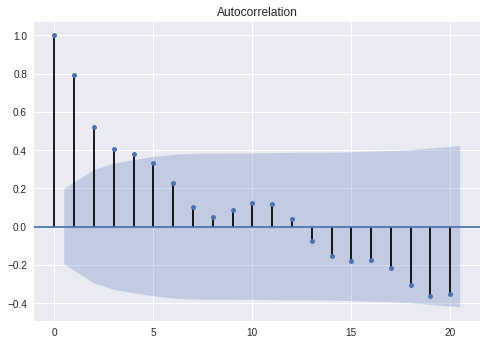

In [125]:
# plotting the auto correlation function for residuals
plot_acf(residuals)

# ljung-box test for auto-correlation function
p_value = sm.stats.diagnostic.acorr_ljungbox(residuals, lags = [10])[1]
print("P-value for the ljung box test is ", p_value)

**6.1.3 Normality of Residuals Test**

(0.9891008138656616, 0.5996686220169067)
p-value for shapiro test is 0.5996686220169067


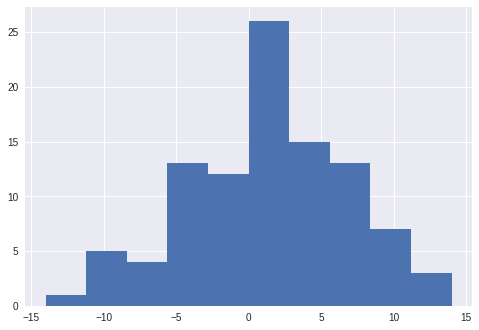

In [133]:
# plotting the histogram of the residuals
plt.hist(residuals.values)

# performing shapiro-wilik test for normality
p_value = stats.shapiro(residuals)[1]
print("p-value for shapiro test is", p_value)

**Conclusion:**

1. **No Auto-Correlation**: Both ACF plot and ljung box test suggest that there is an auto-correaltion amongst the residuals. 

Ljung-Box Test: Assumes a null hypothesis that there is no auto-correlation amongst residuals, But, p-value < 0.005 suggest that we reject the null hypothesis in favour of alternative hypothesis that there is an auto-correaltion.

2. **Zero Mean**: Mean is 1.33 close to zero but not exactly zero. 

Conclusion: Above two points signifies that the residuals are not white noise and there is information left in the data which is not captured by the naive method and hence naive is not the optimal forecast method to be used for this data.

Additional Properties:

1. Contant variance: Looks like variance is contant throughout.

2. Normal Distribution of Residuals: Both histogram and shapiro-wilik test confirms the normal distribution of residuals and hence prediction intervals would be more accurate.

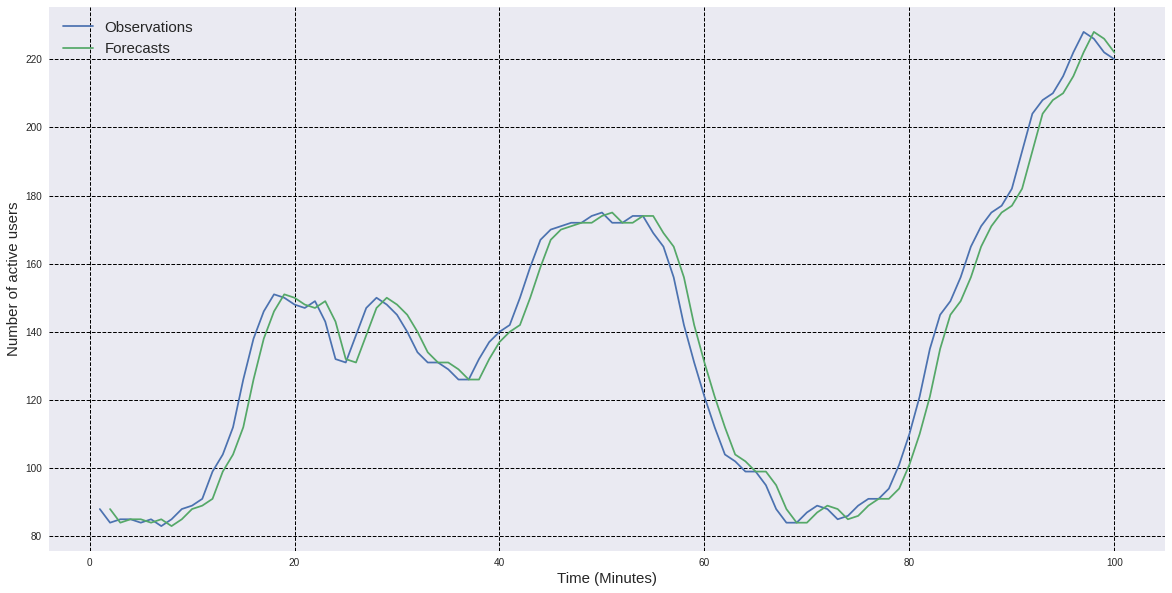

In [137]:
# plotting the original data and the forecasts on the same plot
plt.figure(figsize = (20, 10))
plt.plot(ts_wwwusage, label = 'Observations')
plt.plot(ts_wwwusage_forecasts.loc[2:, :], label = 'Forecasts')
plt.grid(linestyle = '--', color = 'black')
plt.xlabel("Time (Minutes)", fontsize = 15)
plt.ylabel("Number of active users", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

**6.2 bricksq**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a8895f2b0>)

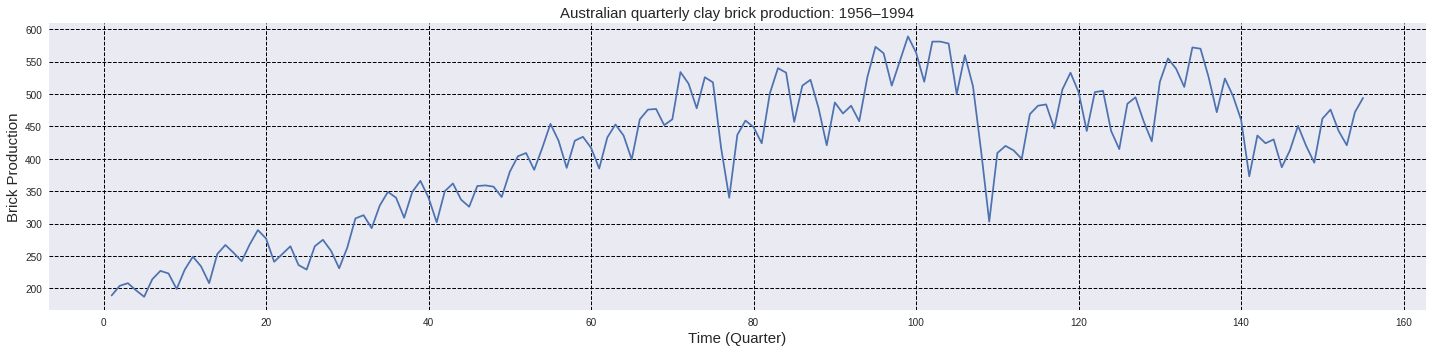

In [163]:
ts_bricksq = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/bricksq.csv", index_col = "Unnamed: 0")
ts_bricksq.rename(columns = {'x': 'value'}, inplace = True)

# plotting the time series data
plot_time_series(ts_bricksq, xlabel = "Time (Quarter)", ylabel = "Brick Production", title = "Australian quarterly clay brick production: 1956–1994")

Seasonal pattern is present in the data. Using seasonal naive.

In [164]:
ts_bricksq_forecasts = s_naive_forecast(ts_bricksq, 5, horizon_start=1, horizon_end = 155)  # computing the forecasts
ts_bricksq_forecasts.rename(columns = {0: "value"}, inplace = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [168]:
residuals = ts_bricksq - ts_bricksq_forecasts  # computing the residuals
residuals = residuals.loc[5:, :]  # removing the first four rows as we do not have the forecasts for first season

**6.2.1 TIme Series Plot for the Residuals**


Mean of the residuals is value    6.834437
dtype: float64


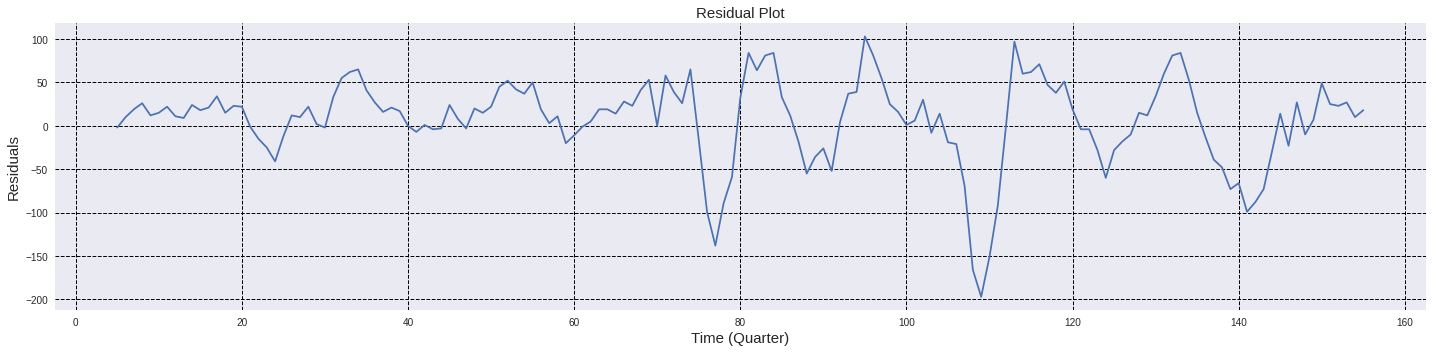

In [171]:
plot_time_series(residuals, xlabel = "Time (Quarter)", ylabel = 'Residuals', title = "Residual Plot")

print("Mean of the residuals is", np.mean(residuals))

**6.2.2 Check for Auto-Correlation between Residuals**

p-value of ljung-box test is [6.24213924e-46]


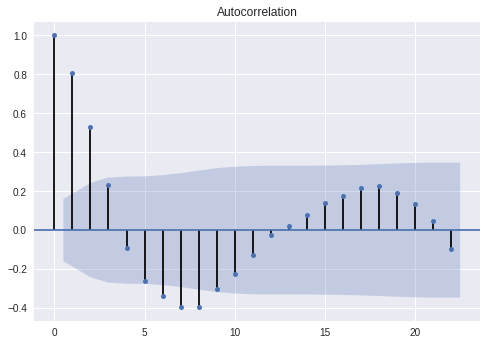

In [173]:
plot_acf(residuals)

# Ljung-box test

p_value = sm.stats.diagnostic.acorr_ljungbox(residuals, lags = [8])[1]
print("p-value of ljung-box test is", p_value)

**6.2.3 Check for normal distribution**

P-value of shapiro wilik test is 4.768948258515593e-08


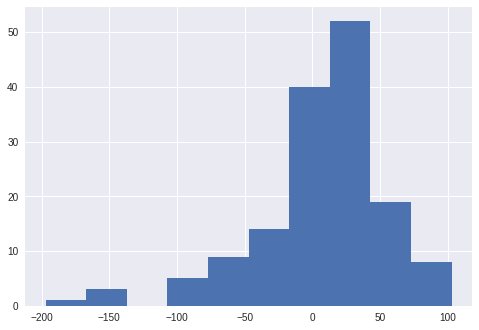

In [176]:
# plotting the histogram of the residuals
plt.hist(residuals.values)

# shapiro-wilik test for normality
p_value = stats.shapiro(residuals)[1]
print("P-value of shapiro wilik test is", p_value)

**Conlusion**

1. **No Auto-Correlation**: Both ACF plot and ljung boxx suggest that there is an auto-correlation between the residuals.

2. **Zero Mean**: Mean of the residuals is 6.3 which is not at all close to zero.

Addition Properties:

1. **Constant variance**: Looks like residuals has many outliers and thus variance is not constant throughtout. 

2. **Normal Distribution**: Histogram and shapiro wilik test suggest that residuals are not normally distributed.

Final: Residuals are not white noise and hence seasonal naive method does not capture all the information available in the data.

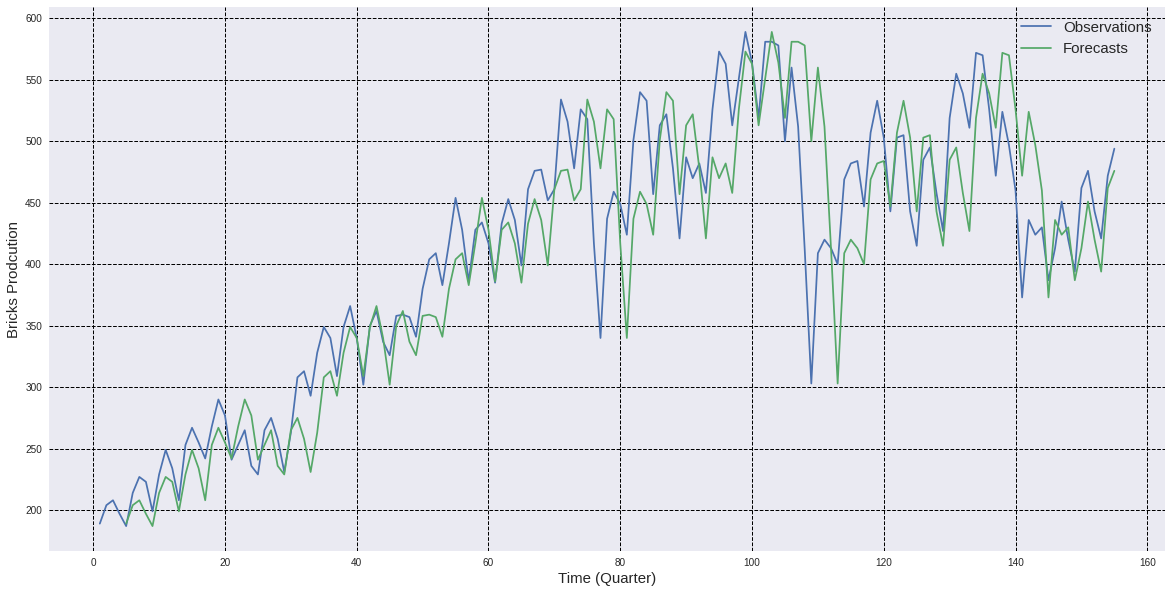

In [178]:
# plotting the original data and the forecasts on the same plot
plt.figure(figsize = (20, 10))
plt.plot(ts_bricksq, label = 'Observations')
plt.plot(ts_bricksq_forecasts.loc[5:, :], label = 'Forecasts')
plt.grid(linestyle = '--', color = 'black')
plt.xlabel("Time (Quarter)", fontsize = 15)
plt.ylabel("Bricks Prodcution", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()